In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import os
import json
import matplotlib.pyplot as plt

(100, 1500)
(100, 1500)
(100, 1500)
(100, 1500)
(1500,)


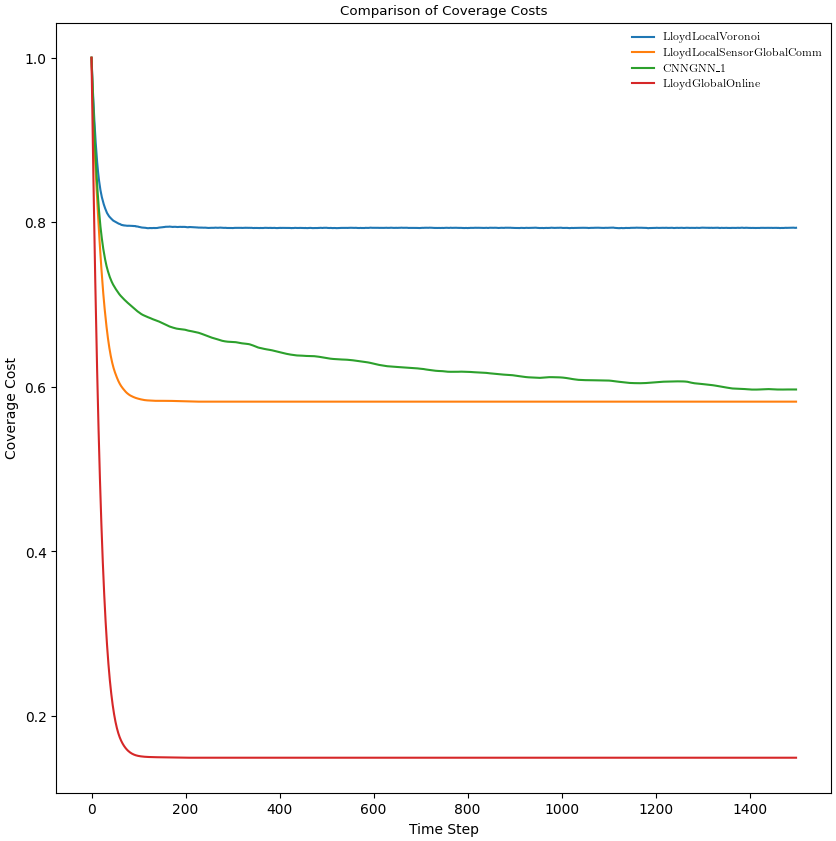

In [2]:
from numpy import genfromtxt

import scienceplots

def compute_quartiles(data):
    Q1, median, Q3 = np.percentile(data, [25, 50, 75])

    IQR = Q3 - Q1

    loval = Q1 - 1.5 * IQR
    hival = Q3 + 1.5 * IQR

    wiskhi = np.compress(data <= hival, data)
    wisklo = np.compress(data >= loval, data)
    actual_hival = np.max(wiskhi)
    actual_loval = np.min(wisklo)

    Qs = [np.mean(data), actual_loval, actual_hival]
    return Qs


results_dir = '/root/CoverageControl_ws/results/'
controllers = ["LloydLocalVoronoi","LloydLocalSensorGlobalComm", "CNNGNN_1","LloydGlobalOnline"]


num_controllers = len(controllers)

data = []
data_std = []
for controller in controllers:
    file_name = results_dir + controller + '/eval.csv'
    controller_data = genfromtxt(file_name, delimiter=',')
    print(controller_data.shape)
    for i in range(controller_data.shape[0]):
        controller_data[i] = controller_data[i]/np.squeeze(controller_data[i, 0])

    data.append(np.mean(controller_data[:, :], axis = 0))
    data_std.append(np.std(controller_data[:, :], axis = 0))

print(data_std[0].shape)

#lloyds = np.stack(cov["lloyds"])
#Qs_all = np.zeros((num_controllers, episode_size, 3))
#for c in range(num_controllers):
#    cov[controllers[c]] = (np.mean(coverage_data_all[c], axis=0), np.std(coverage_data_all[c], axis=0))
#    for i in range(episode_size):
#        Qs_all[c, i] = (compute_quartiles(coverage_data_all[c, :, i]))
    #prev_val = np.stack(cov[c])
    #cov[c] = (np.mean(np.stack(cov[c]), axis=0), np.std(np.stack(cov[c]), axis=0))
    #cov[f"{c}_norm"] = (np.mean(prev_val/lloyds, axis=0), np.std(prev_val/lloyds, axis=0))
    #exp[c] = np.mean(np.stack(exp[c]), axis=0)
    #wexp[c] = np.mean(np.stack(wexp[c]), axis=0)


SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 22

#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
#plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
#plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
#plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize


plt.figure(figsize=(10,10))
for c in range(num_controllers):
    #plt.plot(Qs_all[c,:,1])
    plt.plot(data[c], label=controllers[c])
    #plt.fill_between(range(0, data[c].shape[0]), data[c] + data_std[c], data[c] - data_std[c], alpha=0.5)

plt.style.use(['science','ieee'])
plt.xlabel('Time Step')
plt.ylabel('Coverage Cost')
plt.title('Comparison of Coverage Costs')
plt.legend()

plt.show()

#plt.figure(figsize=(10,10))
#N = [50, 100, 500, 1000]
#cost_vals = []
#for i in range(len(controllers)):
#    c = controllers[i]
#    o = oracles[i]
#    cost_vals.append(np.min(cov[c][0][-1]) / np.min(cov[o][0][-1]))
#plt.plot(N, cost_vals)
#plt.xlabel('Number of Agents')
#plt.ylabel('Ratio of Learned to Expert Controller Costs')
#plt.title('Effect of Varying Agent Density', fontsize=22)
#plt.legend(controllers)
#plt.show()

In [3]:
import torch
import matplotlib
import matplotlib.pyplot as plt

In [22]:
comm_maps = torch.load('/root/CoverageControl_ws/datasets/cnn/data/val/comm_maps.pt')
robot_positions = torch.load('/root/CoverageControl_ws/datasets/cnn/data/val/robot_positions.pt')
comm_maps_dense = comm_maps.to_dense()
print(comm_maps.shape)
print(robot_positions.shape)
print(comm_maps_dense[:, 1:].to_sparse())

torch.Size([40000, 50, 2, 32, 32])
torch.Size([40000, 50, 2])
tensor(indices=tensor([], size=(5, 0)),
       values=tensor([], size=(0,)),
       size=(40000, 49, 2, 32, 32), nnz=0, layout=torch.sparse_coo)


In [23]:
pos=robot_positions[0]
relative_pos = pos.unsqueeze(0) - pos.unsqueeze(1)
dist = relative_pos.norm(2, 2)
mask = dist < 256
scaled_pos = torch.round(relative_pos*32/(256*2) + 15.5)
rpos = scaled_pos[0][mask[0]]
print(rpos)
(relative_pos[0, mask[0]]+256)/512

tensor([[16., 16.],
        [13.,  9.],
        [26., 25.],
        [12., 28.],
        [30., 22.]])


tensor([[0.5000, 0.5000],
        [0.4130, 0.3042],
        [0.8268, 0.7943],
        [0.4026, 0.9026],
        [0.9507, 0.7044]])

tensor(indices=tensor([[12, 13, 26, 30],
                       [28,  9, 25, 22]]),
       values=tensor([0.4026, 0.4130, 0.8268, 0.9507]),
       size=(32, 32), nnz=4, layout=torch.sparse_coo)


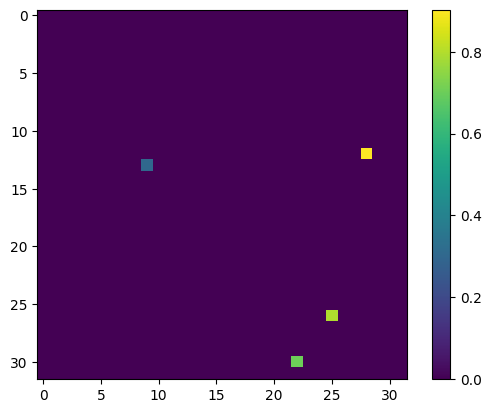

In [24]:
print(comm_maps[0][0][0])
plt.figure()
plt.imshow(comm_maps[0][0][1].to_dense())
plt.colorbar()
plt.show()

In [ ]:
plt.figure()
plt.imshow(comm_maps[200][0][0])
plt.show()

In [ ]:
comm_maps = torch.load('/root/CoverageControl_ws/datasets/reasonable_pure_coverage_ramya/gnn_STABLE/test/coverage_maps.pt')
comm_maps.shape
robot_positions = torch.load('/root/CoverageControl_ws/datasets/reasonable_pure_coverage_ramya/gnn_STABLE/test/robot_positions.pt')
print(robot_positions.shape)

In [ ]:
robot_positions[1000][36]

In [ ]:
plt.figure()
plt.imshow(comm_maps[1000][36][0])
plt.show()